In [174]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [175]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [176]:
print(data.shape)

(500, 9)


In [177]:
continuous_features = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']].values /100

categorical_research_features = data['Research'].values

Y = data['Chance of Admit']

In [178]:
data = pd.DataFrame(continuous_features,columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA'])

data['Research'] = categorical_research_features

X = data

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [180]:
X = tf.constant(X_train.values,dtype= tf.float32)
Y = tf.constant(y_train.values,dtype = tf.float32)

In [181]:
test_X = tf.constant(X_test.values,dtype=tf.float32)
test_y = tf.constant(y_test.values,dtype=tf.float32)

In [184]:
def mean_squared_error(y,y_pred):
    return tf.reduce_mean(tf.square(y_pred - y))

def mean_squared_error_deriv(y,y_pred):
    return tf.reshape(tf.reduce_mean(2 * (y_pred - y)),[1,1])

def h(X,weight,bias):
    return tf.tensordot(X,weight,axes=1) + bias

Loss is 5.77679443359375
Loss is 1.3499977588653564
Loss is 0.4720078408718109
Loss is 0.29559287428855896
Loss is 0.26573672890663147
Loss is 0.2546328008174896
Loss is 0.2542581558227539
Loss is 0.253950297832489
Loss is 0.2557069659233093
Loss is 0.2548930048942566


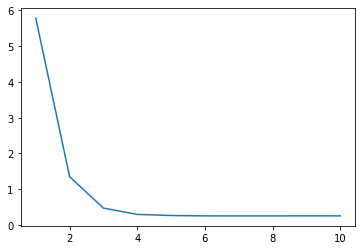

In [186]:
num_epochs = 10
num_sample = X.shape[0]
batch_size =10
leanring_rate = 0.01


dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.shuffle(500).repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal((num_features,1))
bias =0

epochs_plot = list()
loss_plot = list()

for i in range(num_epochs):
    epoch_loss = list()
    for b in range(int(num_sample / batch_size)):
        x_batch,y_batch = iterator.next()
        
        output = h(x_batch,weight,bias)
        loss = epoch_loss.append(mean_squared_error(y_batch,output).numpy())
        
        dJ_dH = mean_squared_error_deriv(y_batch,output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
        dJ_dB = tf.reduce_mean(dJ_dH)
        
        weights -= (leanring_rate * dJ_dW)
        bias  -= (leanring_rate * dJ_dB)
        
    loss = np.array(epoch_loss).mean()
    epochs_plot.append(i +1)
    loss_plot.append(loss)
    
    print("Loss is {}".format(loss))
    
plt.plot(epochs_plot,loss_plot)